<a href="https://colab.research.google.com/github/samer-glitch/Leveraging-Machine-Learning-for-Identifying-and-Classifying-Cyber-Threats-in-Network-Environments/blob/main/Traffic%20Classification%20and%20Security%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Unicauca-dataset-April-June-2019-Network-flows-5000rows(ALLFEATURES).csv to Unicauca-dataset-April-June-2019-Network-flows-5000rows(ALLFEATURES).csv


In [4]:
from google.colab import files
uploaded = files.upload()


Saving Unicauca-dataset-April-June-2019-Network-flows-10000rows(ALLFEATURES).csv to Unicauca-dataset-April-June-2019-Network-flows-10000rows(ALLFEATURES).csv


step 1 - label_traffic new column added to the dataset


,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label
0,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,22,7620,328,...,1.550000e+12,0.010354,198.657965,51.689181,84.916348,2,Network,Unknown,DHCP,malicious
1,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,17,5670,328,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP,malicious
2,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,43,15124,328,...,1.550000e+12,0.022332,340.268454,89.927588,124.270745,2,Network,Unknown,DHCP,malicious
3,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,30,10086,328,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,DHCP,malicious
4,cfa7c2740072befaa89c202499729e08,3232266497,192.168.121.1,0,10.130.1.166,0,1,1,56,56,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,ICMP,malicious


step 2 - Specific Features dropped


,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,avg_ps,std_dev_ps,flowStart,...,f_avg_ps,f_std_dev_ps,f_max_piat,f_avg_piat,f_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label
0,192.168.121.1,67,172.16.255.185,67,17,22,7620,346.363636,25.010081,1555953531,...,333.529412,9.140200,198.657170,106.336589,74.034708,2,Network,Unknown,DHCP,malicious
1,192.168.121.1,67,172.16.255.186,67,17,17,5670,333.529412,9.140200,1555953531,...,333.529412,9.140200,198.657267,106.336595,74.034707,2,Network,Unknown,DHCP,malicious
2,192.168.121.1,67,172.16.255.185,67,17,43,15124,351.720930,26.098495,1555963574,...,335.400000,9.718024,248.424737,50.033357,65.290032,2,Network,Unknown,DHCP,malicious
3,192.168.121.1,67,172.16.255.186,67,17,30,10086,336.200000,10.057833,1555963574,...,336.200000,10.057833,248.424689,50.033349,65.510537,2,Network,Unknown,DHCP,malicious
4,192.168.121.1,0,10.130.1.166,0,1,1,56,56.000000,0.000000,1555966499,...,56.000000,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,ICMP,malicious


Dataset Loaded and Preprocessed - Time Elapsed: 0:00:00.000078
 NaN values and mixed types Handled - Time Elapsed: 0:00:00.018543
step 3 - NaN values and mixed types Handled


,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,avg_ps,std_dev_ps,flowStart,...,f_avg_ps,f_std_dev_ps,f_max_piat,f_avg_piat,f_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label
0,192.168.121.1,67,172.16.255.185,67,17,22,7620,346.363636,25.010081,1555953531,...,333.529412,9.140200,198.657170,106.336589,74.034708,2,Network,Unknown,DHCP,malicious
1,192.168.121.1,67,172.16.255.186,67,17,17,5670,333.529412,9.140200,1555953531,...,333.529412,9.140200,198.657267,106.336595,74.034707,2,Network,Unknown,DHCP,malicious
2,192.168.121.1,67,172.16.255.185,67,17,43,15124,351.720930,26.098495,1555963574,...,335.400000,9.718024,248.424737,50.033357,65.290032,2,Network,Unknown,DHCP,malicious
3,192.168.121.1,67,172.16.255.186,67,17,30,10086,336.200000,10.057833,1555963574,...,336.200000,10.057833,248.424689,50.033349,65.510537,2,Network,Unknown,DHCP,malicious
4,192.168.121.1,0,10.130.1.166,0,1,1,56,56.000000,0.000000,1555966499,...,56.000000,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,ICMP,malicious


Categorical Labels Encoded - Time Elapsed: 0:00:00.043141
step 4 - After Encodign categorical labels


,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,avg_ps,std_dev_ps,flowStart,...,f_std_dev_ps,f_max_piat,f_avg_piat,f_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label,traffic_label_encoded
0,192.168.121.1,67,172.16.255.185,67,17,22,7620,346.363636,25.010081,1555953531,...,9.140200,198.657170,106.336589,74.034708,2,Network,Unknown,DHCP,malicious,0
1,192.168.121.1,67,172.16.255.186,67,17,17,5670,333.529412,9.140200,1555953531,...,9.140200,198.657267,106.336595,74.034707,2,Network,Unknown,DHCP,malicious,0
2,192.168.121.1,67,172.16.255.185,67,17,43,15124,351.720930,26.098495,1555963574,...,9.718024,248.424737,50.033357,65.290032,2,Network,Unknown,DHCP,malicious,0
3,192.168.121.1,67,172.16.255.186,67,17,30,10086,336.200000,10.057833,1555963574,...,10.057833,248.424689,50.033349,65.510537,2,Network,Unknown,DHCP,malicious,0
4,192.168.121.1,0,10.130.1.166,0,1,1,56,56.000000,0.000000,1555966499,...,0.000000,0.000000,0.000000,0.000000,2,Network,Unknown,ICMP,malicious,0


Data Split into Training 80% and Testing 20% of the dataset - Time Elapsed: 0:00:00.075913
Scaling to numeric data Completed - Time Elapsed: 0:00:00.086016
step 5 - Scaling oto numeric data Completed
SMOT for class imbalance applied - Time Elapsed: 0:00:00.160354
step 6 - SMOT applied
StratifiedKFold 5 folds cross-validator Implemented - Time Elapsed: 0:00:00.161497
step 7 - cross validation 5 fold applied
Hyperparameter Tuning applied to all models - Time Elapsed: 0:00:00.162565
step 8 - Hyperparameter Tuning applied
Classifiers Fitted - Time Elapsed: 0:00:06.414846


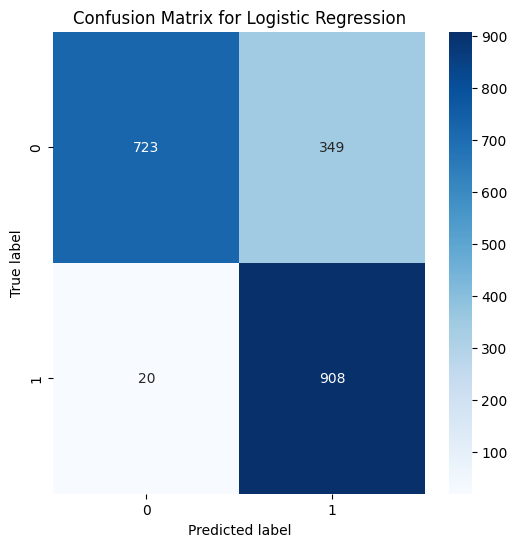

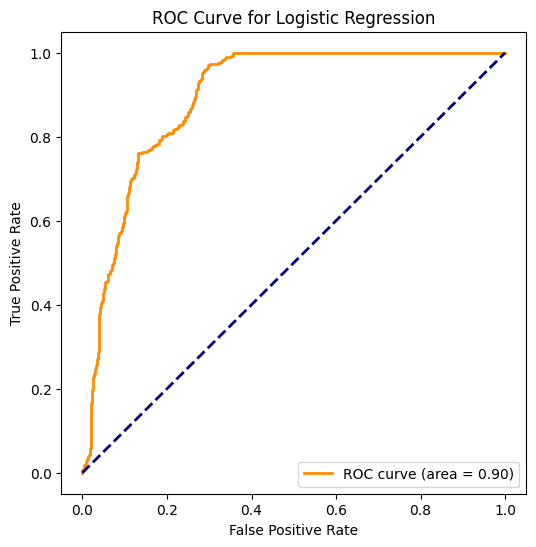

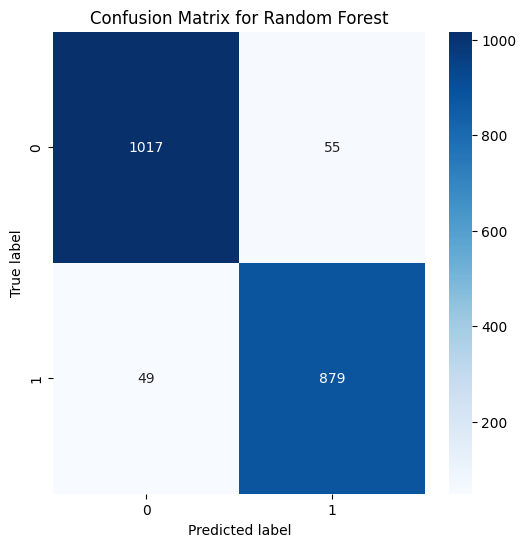

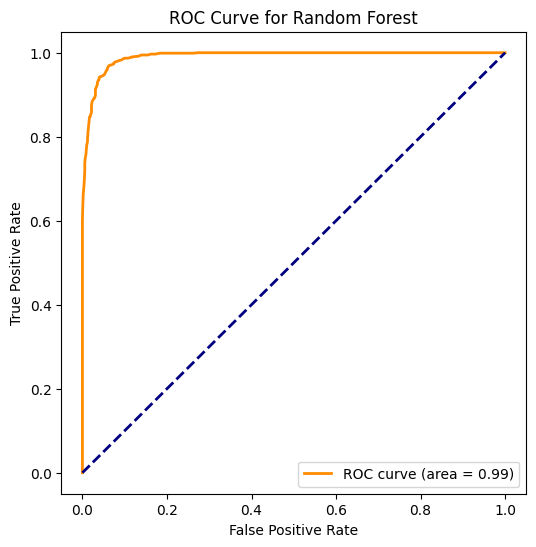

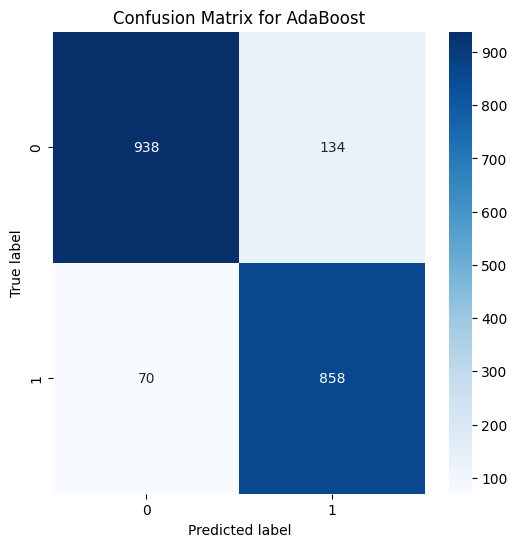

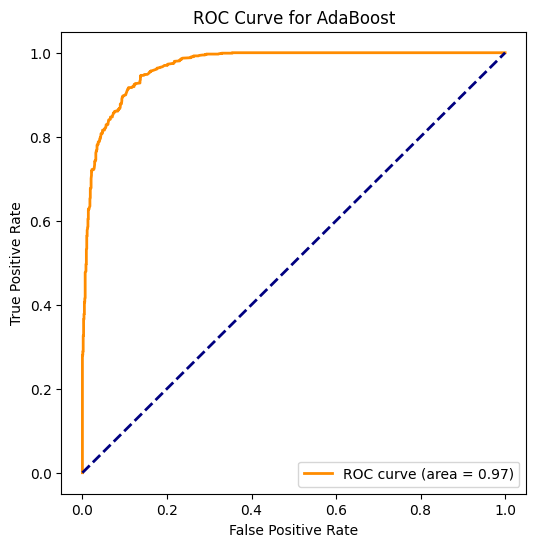

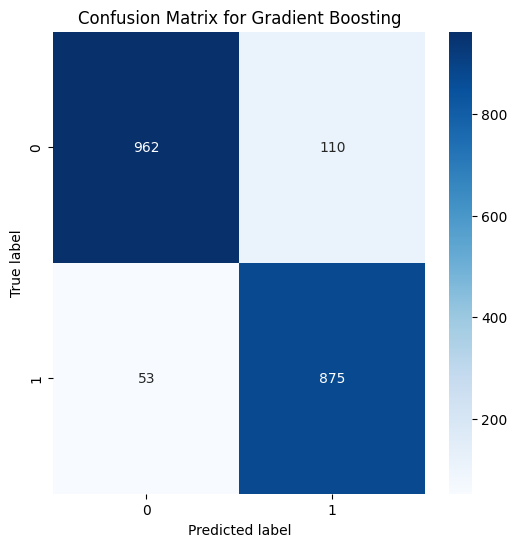

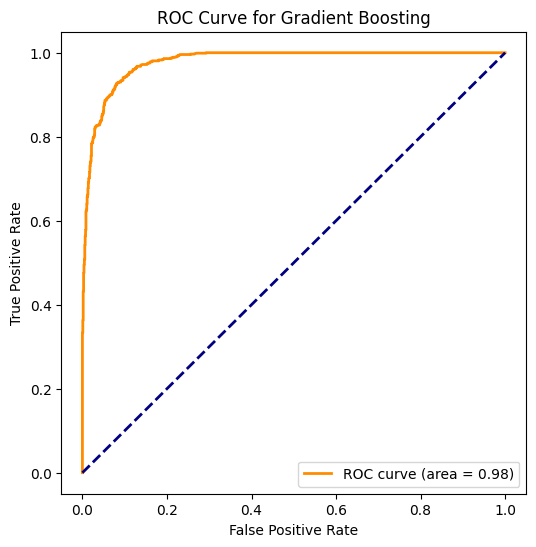

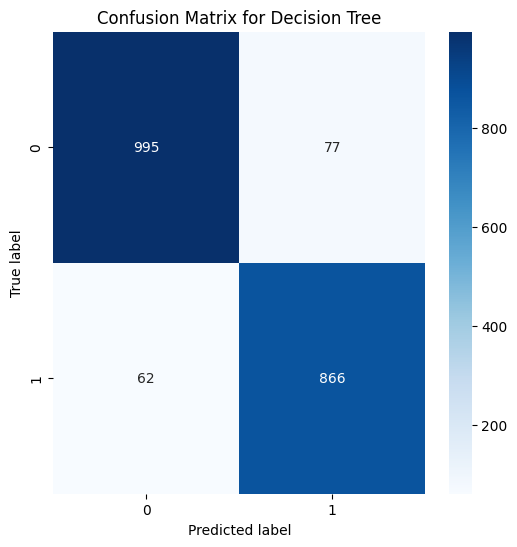

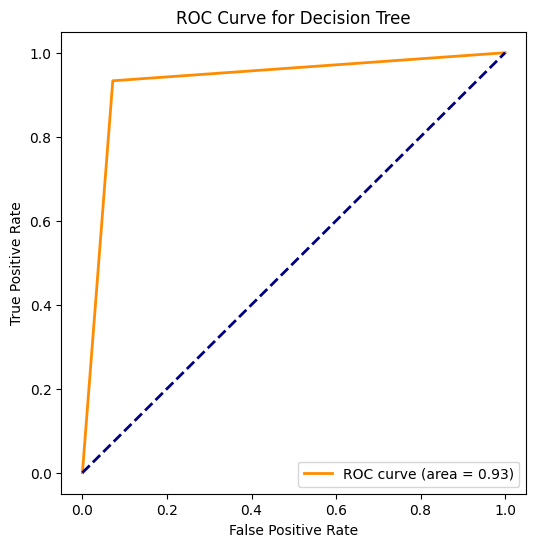


Logistic Regression Classifier:
Accuracy: 0.8155 
F1-Score: 0.8311212814645309 
Recall: 0.978448275862069 
Precision: 0.7223548130469372

Random Forest Classifier:
Accuracy: 0.948 
F1-Score: 0.9441460794844253 
Recall: 0.947198275862069 
Precision: 0.9411134903640257

AdaBoost Classifier:
Accuracy: 0.898 
F1-Score: 0.8937499999999998 
Recall: 0.9245689655172413 
Precision: 0.8649193548387096

Gradient Boosting Classifier:
Accuracy: 0.9185 
F1-Score: 0.9147935180345008 
Recall: 0.9428879310344828 
Precision: 0.8883248730964467

Decision Tree Classifier:
Accuracy: 0.9305 
F1-Score: 0.9257081774452165 
Recall: 0.9331896551724138 
Precision: 0.9183457051961824
malicious    5359
normal       4641
Name: traffic_label, dtype: int64

Process Completed - Time: 0:00:10.242174


In [14]:
# Reduced Features after Feature Engineering and Analysis - 5 000 instances (5 000 rows - each row is an instance - each row comprises 50 features + created for labeling but now reduced to 30 + 1 (created for encoding so 31)
# Cross validation applied + Kfold = 10, Hyperparameter tuning applied
# 5 Machine Learning exectuted in this environment: RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier, LogisticRegression
# Bagging (Bootstrap Aggregating) It builds multiple decision trees and merges them together to get a more accurate and stable prediction. Each tree is trained on a random subset of the data.
# AdaBoostClassifier (Adaptive Boosting): Boosting. It combines multiple weak classifiers to create a strong classifier. Each classifier is trained on data, taking into account the previous classifiers' mistakes, by adjusting the weights of incorrectly classified instances.
# GradientBoostingClassifier: Boosting. It builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. Each new model is trained to correct the errors made by previous models.
# DecisionTreeClassifier: Neither bagging nor boosting. It is a single decision tree and can be used as a base estimator in bagging and boosting methods.
# LogisticRegression: Neither bagging nor boosting. It is a single model that uses a logistic function to model a binary dependent variable. However, it can be used as a base estimator in ensemble methods.

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.exceptions import ConvergenceWarning
from IPython.display import display

def record_time(step_name, overall_start_time):
    print(f"{step_name} - Time Elapsed: {datetime.datetime.now() - overall_start_time}")

def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_roc_curve(y_true, y_scores, classifier_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_name}')
    plt.legend(loc='lower right')
    plt.show()

# Define a function to label traffic as normal or malicious
def label_traffic(df):
    # Define normal thresholds
    normal_protocols = [6, 17, 1]  # TCP and UDP
    normal_port_range = set(range(0, 49152))
    normal_pkt_count_max = 2000
    normal_octet_count_max = 1000000
    normal_packet_size_range = range(20, 1500)
    normal_flow_duration_range = range(50, 3600000)  # 50 ms to 1 hour
    normal_piat_range = range(0, 10000)  # 0 to 10 seconds
    max_timestamp = int(1e12)  # Assuming timestamp in milliseconds

    # Initialize the traffic_label column
    df['traffic_label'] = 'normal'

    # Vectorized conditions
    df.loc[~df['proto'].isin(normal_protocols), 'traffic_label'] = 'malicious'
    df.loc[df['flowEndReason'] == 1, 'traffic_label'] = 'malicious'
    df.loc[~df['src_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[~df['dst_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[df['pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
    df.loc[df['octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
    df.loc[~df['min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
    df.loc[~df['min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[(df['flowStart'] < 0) | (df['flowStart'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[(df['flowEnd'] < 0) | (df['flowEnd'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[df['flowEnd'] < df['flowStart'], 'traffic_label'] = 'malicious'

    # Process forward and backward flow features
    for prefix in ['f_', 'b_']:
        df.loc[df[prefix + 'pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
        df.loc[df[prefix + 'octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'

        # Convert IP columns to string, handling NaN values
        df['src_ip'] = df['src_ip'].fillna('unknown').astype(str)
        df['dst_ip'] = df['dst_ip'].fillna('unknown').astype(str)

        # IP Address checks
        normal_src_ip_ranges = ['192.168.', '10.', '172.']
        df.loc[df['src_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'
        df.loc[df['dst_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'


    # Web service, application protocol, and category checks
    normal_web_services = ['Google', 'Microsoft', 'HTTP', 'DNS', 'Amazon', 'MSN', 'TLS', 'Yahoo', 'DHCP', 'WindowsUpdate', 'NetBIOS', 'RX', 'MS_OneDrive', 'GMail', 'Dropbox', 'GoogleServices', 'ICMP', 'UbuntuONE', 'GoogleDrive', 'YouTube', 'HTTP_Proxy', 'NTP', 'Apple', 'AppleiTunes', 'AppleStore', 'ApplePush', 'AppleiCloud', 'IMAPS', 'IMO', 'Office365', 'Skype', 'Cloudflare']
    normal_application_protocols = ['HTTP', 'TLS', 'DNS', 'QUIC', 'IMAPS', 'STUN', 'SMTPS', 'POPS', 'Skype', 'SMBv23', 'NetBIOS', 'RDP', 'ApplePush', 'MQTT']
    normal_categories = ['Network', 'Web', 'SoftwareUpdate', 'RPC', 'System', 'Cloud', 'Mail', 'FTP', 'VPN', 'RemoteAccess', 'Email', 'Media', 'Streaming', 'VoIP', 'Collaborative']

    df.loc[~df['web_service'].isin(normal_web_services), 'traffic_label'] = 'malicious'
    df.loc[~df['application_protocol'].isin(normal_application_protocols), 'traffic_label'] = 'malicious'
    df.loc[~df['category'].isin(normal_categories), 'traffic_label'] = 'malicious'

    return df

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-10000rows(ALLFEATURES).csv')
df = label_traffic(df)

print("step 1 - label_traffic new column added to the dataset")
display(df.head(5))

# Drop specified features
drop_features = ['flow_key', 'src_ip_numeric', 'min_ps', 'max_ps', 'f_flowStart', 'f_flowEnd', 'f_flowDuration', 'f_min_piat'] + [col for col in df if col.startswith('b_')]
df.drop(drop_features, axis=1, inplace=True)
print("step 2 - Specific Features dropped")
display(df.head(5))

overall_start_time = datetime.datetime.now()
record_time("Dataset Loaded and Preprocessed", overall_start_time)

# Handle NaN values and mixed types
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype == np.float64 else x.fillna('Unknown'))
record_time(" NaN values and mixed types Handled", overall_start_time)

print("step 3 - NaN values and mixed types Handled")
display(df.head())

# Encode categorical labels
label_encoder = LabelEncoder()
df['traffic_label_encoded'] = label_encoder.fit_transform(df['traffic_label'])
record_time("Categorical Labels Encoded", overall_start_time)

print("step 4 - After Encodign categorical labels")
display(df.head(5))

# Split data into training and testing sets
X = df.drop(['traffic_label', 'traffic_label_encoded'], axis=1)
y = df['traffic_label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
record_time("Data Split into Training 80% and Testing 20% of the dataset", overall_start_time)

# Filter only numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Apply scaling to numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
record_time("Scaling to numeric data Completed", overall_start_time)
print("step 5 - Scaling oto numeric data Completed")

# SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
record_time("SMOT for class imbalance applied", overall_start_time)
print("step 6 - SMOT applied")

# Define the StratifiedKFold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
record_time("StratifiedKFold 5 folds cross-validator Implemented", overall_start_time)
print("step 7 - cross validation 5 fold applied")

# Hyperparameter grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500]
}
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
}
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
}
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
record_time("Hyperparameter Tuning applied to all models", overall_start_time)
print("step 8 - Hyperparameter Tuning applied")

# Suppress ConvergenceWarning for logistic regression
warnings.filterwarnings("ignore", category=ConvergenceWarning)
lr_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
ab_clf = AdaBoostClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

lr_clf.fit(X_train_resampled, y_train_resampled)
rf_clf.fit(X_train_resampled, y_train_resampled)
ab_clf.fit(X_train_resampled, y_train_resampled)
gb_clf.fit(X_train_resampled, y_train_resampled)
dt_clf.fit(X_train_resampled, y_train_resampled)
record_time("Classifiers Fitted", overall_start_time)

# Evaluate models and plot confusion matrices and ROC curves
for clf, name in [(lr_clf, 'Logistic Regression'), (rf_clf, 'Random Forest'), (ab_clf, 'AdaBoost'), (gb_clf, 'Gradient Boosting'), (dt_clf, 'Decision Tree')]:
    # Predictions and probabilities
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    # ROC curve
    plot_roc_curve(y_test, y_pred_proba, name)

# Calculate accuracy and F1-score for each model
lr_accuracy, lr_f1 = accuracy_score(y_test, lr_clf.predict(X_test_scaled)), f1_score(y_test, lr_clf.predict(X_test_scaled))
rf_accuracy, rf_f1 = accuracy_score(y_test, rf_clf.predict(X_test_scaled)), f1_score(y_test, rf_clf.predict(X_test_scaled))
ab_accuracy, ab_f1 = accuracy_score(y_test, ab_clf.predict(X_test_scaled)), f1_score(y_test, ab_clf.predict(X_test_scaled))
gb_accuracy, gb_f1 = accuracy_score(y_test, gb_clf.predict(X_test_scaled)), f1_score(y_test, gb_clf.predict(X_test_scaled))
dt_accuracy, dt_f1 = accuracy_score(y_test, dt_clf.predict(X_test_scaled)), f1_score(y_test, dt_clf.predict(X_test_scaled))

# Calculate recall for each model
lr_recall = recall_score(y_test, lr_clf.predict(X_test_scaled))
rf_recall = recall_score(y_test, rf_clf.predict(X_test_scaled))
ab_recall = recall_score(y_test, ab_clf.predict(X_test_scaled))
gb_recall = recall_score(y_test, gb_clf.predict(X_test_scaled))
dt_recall = recall_score(y_test, dt_clf.predict(X_test_scaled))

# Calculate precision for each model
lr_precision = precision_score(y_test, lr_clf.predict(X_test_scaled))
rf_precision = precision_score(y_test, rf_clf.predict(X_test_scaled))
ab_precision = precision_score(y_test, ab_clf.predict(X_test_scaled))
gb_precision = precision_score(y_test, gb_clf.predict(X_test_scaled))
dt_precision = precision_score(y_test, dt_clf.predict(X_test_scaled))

# Print the results
print("\nLogistic Regression Classifier:\nAccuracy:", lr_accuracy, "\nF1-Score:", lr_f1, "\nRecall:", lr_recall, "\nPrecision:", lr_precision)
print("\nRandom Forest Classifier:\nAccuracy:", rf_accuracy, "\nF1-Score:", rf_f1, "\nRecall:", rf_recall, "\nPrecision:", rf_precision)
print("\nAdaBoost Classifier:\nAccuracy:", ab_accuracy, "\nF1-Score:", ab_f1, "\nRecall:", ab_recall, "\nPrecision:", ab_precision)
print("\nGradient Boosting Classifier:\nAccuracy:", gb_accuracy, "\nF1-Score:", gb_f1, "\nRecall:", gb_recall, "\nPrecision:", gb_precision)
print("\nDecision Tree Classifier:\nAccuracy:", dt_accuracy, "\nF1-Score:", dt_f1, "\nRecall:", dt_recall, "\nPrecision:", dt_precision)


class_counts = df['traffic_label'].value_counts()
print(class_counts)
print("\nProcess Completed - Time:", datetime.datetime.now() - overall_start_time)

In [15]:
from google.colab import files
uploaded = files.upload()

Saving Unicauca-dataset-April-June-2019-Network-flows-250000rows(ALLFEATURES).csv to Unicauca-dataset-April-June-2019-Network-flows-250000rows(ALLFEATURES).csv


<ipython-input-17-237014543531>:121: DtypeWarning: Columns (0,2,4,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-250000rows(ALLFEATURES).csv')


step 1 - label_traffic new column added to the dataset


,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label
0,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,17.0,22.0,7620.0,328.0,...,1.550000e+12,0.010354,198.657965,51.689181,84.916348,2.0,Network,Unknown,DHCP,malicious
1,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,17.0,5670.0,328.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP,malicious
2,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,17.0,43.0,15124.0,328.0,...,1.550000e+12,0.022332,340.268454,89.927588,124.270745,2.0,Network,Unknown,DHCP,malicious
3,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,30.0,10086.0,328.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP,malicious
4,cfa7c2740072befaa89c202499729e08,3.232266e+09,192.168.121.1,0.0,10.130.1.166,0.0,1.0,1.0,56.0,56.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,ICMP,malicious


step 2 - Specific Features dropped


,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,avg_ps,std_dev_ps,flowStart,...,f_avg_ps,f_std_dev_ps,f_max_piat,f_avg_piat,f_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label
0,192.168.121.1,67.0,172.16.255.185,67.0,17.0,22.0,7620.0,346.363636,25.010081,1.555954e+09,...,333.529412,9.140200,198.657170,106.336589,74.034708,2.0,Network,Unknown,DHCP,malicious
1,192.168.121.1,67.0,172.16.255.186,67.0,17.0,17.0,5670.0,333.529412,9.140200,1.555954e+09,...,333.529412,9.140200,198.657267,106.336595,74.034707,2.0,Network,Unknown,DHCP,malicious
2,192.168.121.1,67.0,172.16.255.185,67.0,17.0,43.0,15124.0,351.720930,26.098495,1.555964e+09,...,335.400000,9.718024,248.424737,50.033357,65.290032,2.0,Network,Unknown,DHCP,malicious
3,192.168.121.1,67.0,172.16.255.186,67.0,17.0,30.0,10086.0,336.200000,10.057833,1.555964e+09,...,336.200000,10.057833,248.424689,50.033349,65.510537,2.0,Network,Unknown,DHCP,malicious
4,192.168.121.1,0.0,10.130.1.166,0.0,1.0,1.0,56.0,56.000000,0.000000,1.555966e+09,...,56.000000,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,ICMP,malicious


Dataset Loaded and Preprocessed - Time Elapsed: 0:00:00.000116
 NaN values and mixed types Handled - Time Elapsed: 0:00:00.771664
step 3 - NaN values and mixed types Handled


,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,avg_ps,std_dev_ps,flowStart,...,f_avg_ps,f_std_dev_ps,f_max_piat,f_avg_piat,f_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label
0,192.168.121.1,67.0,172.16.255.185,67.0,17.0,22.0,7620.0,346.363636,25.010081,1.555954e+09,...,333.529412,9.140200,198.657170,106.336589,74.034708,2.0,Network,Unknown,DHCP,malicious
1,192.168.121.1,67.0,172.16.255.186,67.0,17.0,17.0,5670.0,333.529412,9.140200,1.555954e+09,...,333.529412,9.140200,198.657267,106.336595,74.034707,2.0,Network,Unknown,DHCP,malicious
2,192.168.121.1,67.0,172.16.255.185,67.0,17.0,43.0,15124.0,351.720930,26.098495,1.555964e+09,...,335.400000,9.718024,248.424737,50.033357,65.290032,2.0,Network,Unknown,DHCP,malicious
3,192.168.121.1,67.0,172.16.255.186,67.0,17.0,30.0,10086.0,336.200000,10.057833,1.555964e+09,...,336.200000,10.057833,248.424689,50.033349,65.510537,2.0,Network,Unknown,DHCP,malicious
4,192.168.121.1,0.0,10.130.1.166,0.0,1.0,1.0,56.0,56.000000,0.000000,1.555966e+09,...,56.000000,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,ICMP,malicious


Categorical Labels Encoded - Time Elapsed: 0:00:01.390280
step 4 - After Encodign categorical labels


,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,avg_ps,std_dev_ps,flowStart,...,f_std_dev_ps,f_max_piat,f_avg_piat,f_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label,traffic_label_encoded
0,192.168.121.1,67.0,172.16.255.185,67.0,17.0,22.0,7620.0,346.363636,25.010081,1.555954e+09,...,9.140200,198.657170,106.336589,74.034708,2.0,Network,Unknown,DHCP,malicious,0
1,192.168.121.1,67.0,172.16.255.186,67.0,17.0,17.0,5670.0,333.529412,9.140200,1.555954e+09,...,9.140200,198.657267,106.336595,74.034707,2.0,Network,Unknown,DHCP,malicious,0
2,192.168.121.1,67.0,172.16.255.185,67.0,17.0,43.0,15124.0,351.720930,26.098495,1.555964e+09,...,9.718024,248.424737,50.033357,65.290032,2.0,Network,Unknown,DHCP,malicious,0
3,192.168.121.1,67.0,172.16.255.186,67.0,17.0,30.0,10086.0,336.200000,10.057833,1.555964e+09,...,10.057833,248.424689,50.033349,65.510537,2.0,Network,Unknown,DHCP,malicious,0
4,192.168.121.1,0.0,10.130.1.166,0.0,1.0,1.0,56.0,56.000000,0.000000,1.555966e+09,...,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,ICMP,malicious,0


Data Split into Training 80% and Testing 20% of the dataset - Time Elapsed: 0:00:01.977548
Scaling to numeric data Completed - Time Elapsed: 0:00:02.173163
step 5 - Scaling oto numeric data Completed
SMOT for class imbalance applied - Time Elapsed: 0:00:43.383915
step 6 - SMOT applied
StratifiedKFold 5 folds cross-validator Implemented - Time Elapsed: 0:00:43.384302
step 7 - cross validation 5 fold applied
Hyperparameter Tuning applied to all models - Time Elapsed: 0:00:43.384757
step 8 - Hyperparameter Tuning applied
Classifiers Fitted - Time Elapsed: 0:14:19.205497


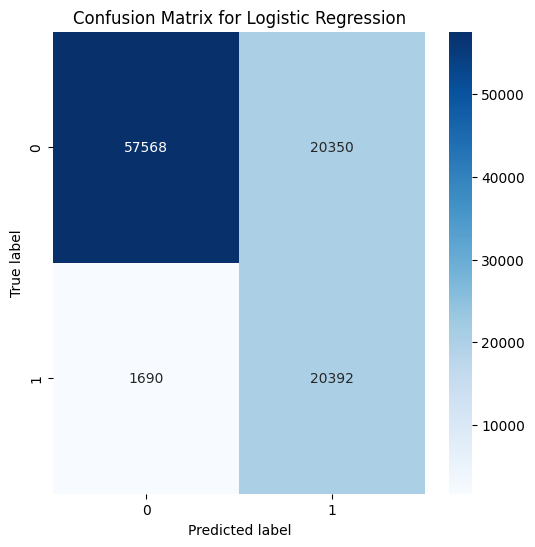

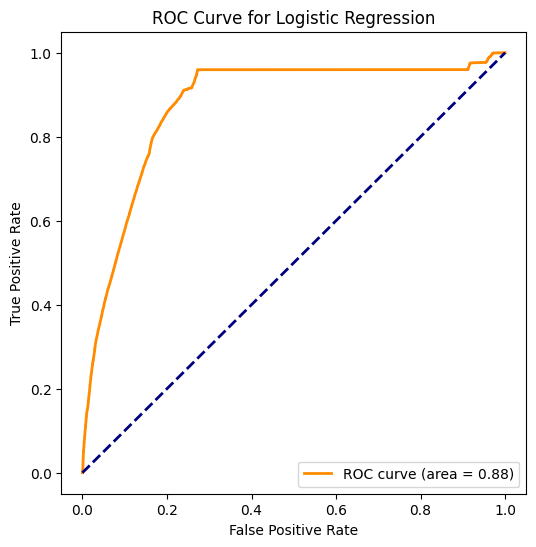

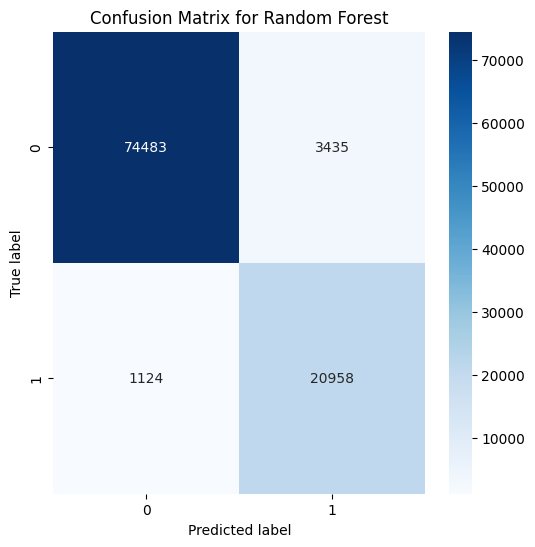

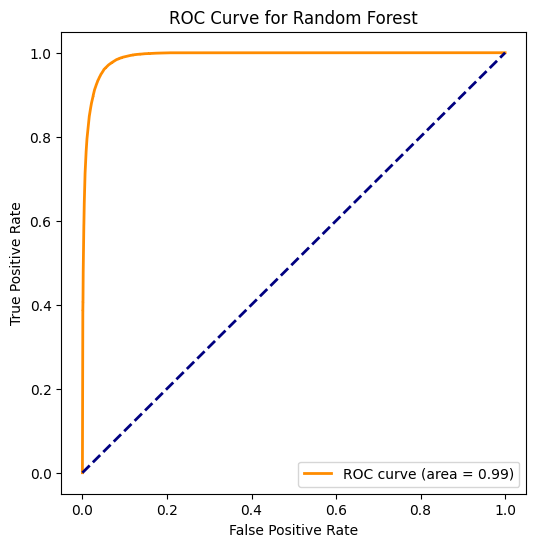

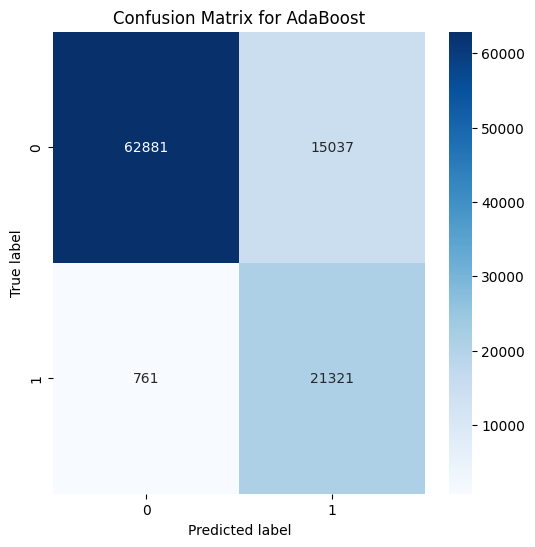

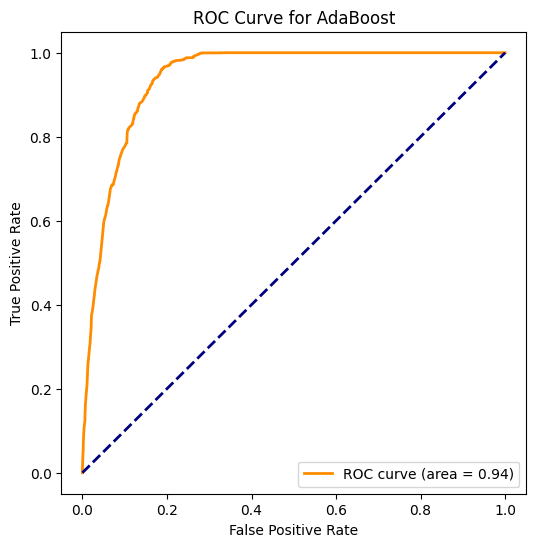

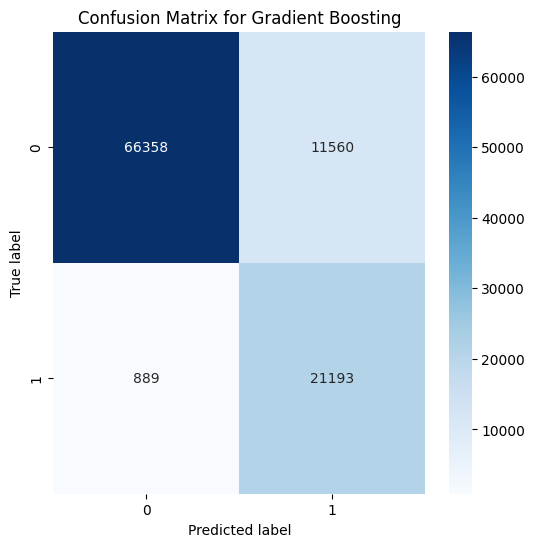

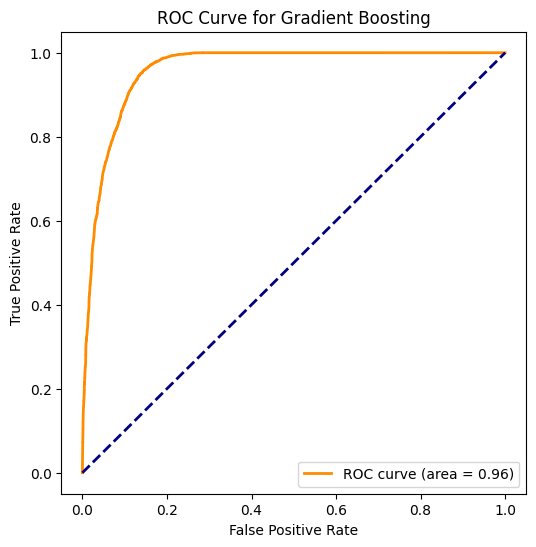

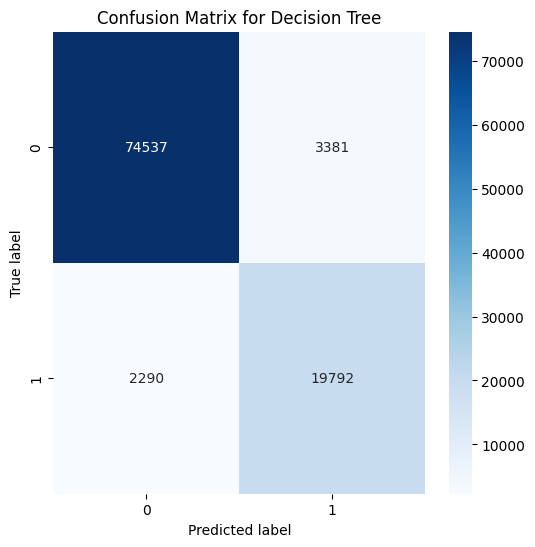

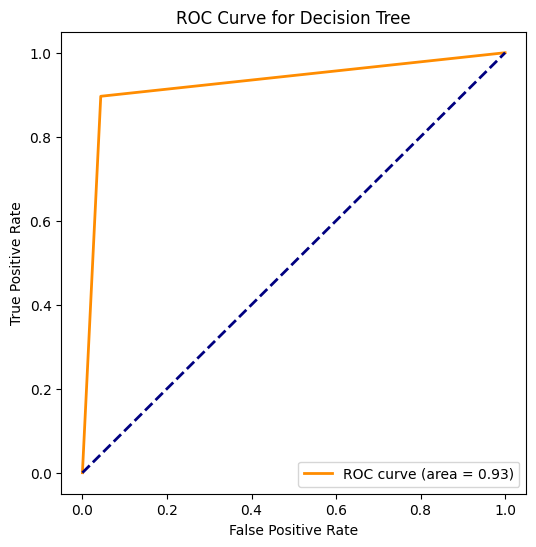


Logistic Regression Classifier:
Accuracy: 0.7796 
F1-Score: 0.6491786578377691 
Recall: 0.9234670772574948 
Precision: 0.5005154386137156 
AUC-ROC: 0.8758145173154439 
Confusion Matrix:
 [[57568 20350]
 [ 1690 20392]]

Random Forest Classifier:
Accuracy: 0.95441 
F1-Score: 0.9019042495965572 
Recall: 0.9490988135132687 
Precision: 0.8591809125568811 
AUC-ROC: 0.9907692546707575 
Confusion Matrix:
 [[74483  3435]
 [ 1124 20958]]

AdaBoost Classifier:
Accuracy: 0.84202 
F1-Score: 0.7296714579055442 
Recall: 0.9655375418893216 
Precision: 0.586418394851202 
AUC-ROC: 0.9409238138801786 
Confusion Matrix:
 [[62881 15037]
 [  761 21321]]

Gradient Boosting Classifier:
Accuracy: 0.87551 
F1-Score: 0.7729734658521018 
Recall: 0.9597409654922562 
Precision: 0.6470552315818399 
AUC-ROC: 0.9596622739552028 
Confusion Matrix:
 [[66358 11560]
 [  889 21193]]
malicious    389588
normal       110412
Name: traffic_label, dtype: int64

Process Completed - Time: 0:14:47.116764


In [17]:
# Reduced Features after Feature Engineering and Analysis - 25 000 instances (25 000 rows - each row is an instance - each row comprises 50 features + created for labeling but now reduced to 30 + 1 (created for encoding so 31)
# Cross validation applied + Kfold = 5, Hyperparameter tuning applied
# 5 Machine Learning exectuted in this environment: RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier, LogisticRegression
# Bagging (Bootstrap Aggregating) It builds multiple decision trees and merges them together to get a more accurate and stable prediction. Each tree is trained on a random subset of the data.
# AdaBoostClassifier (Adaptive Boosting): Boosting. It combines multiple weak classifiers to create a strong classifier. Each classifier is trained on data, taking into account the previous classifiers' mistakes, by adjusting the weights of incorrectly classified instances.
# GradientBoostingClassifier: Boosting. It builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. Each new model is trained to correct the errors made by previous models.
# DecisionTreeClassifier: Neither bagging nor boosting. It is a single decision tree and can be used as a base estimator in bagging and boosting methods.
# LogisticRegression: Neither bagging nor boosting. It is a single model that uses a logistic function to model a binary dependent variable. However, it can be used as a base estimator in ensemble methods.

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.exceptions import ConvergenceWarning
from IPython.display import display

def record_time(step_name, overall_start_time):
    print(f"{step_name} - Time Elapsed: {datetime.datetime.now() - overall_start_time}")

def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_roc_curve(y_true, y_scores, classifier_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_name}')
    plt.legend(loc='lower right')
    plt.show()

# Define a function to label traffic as normal or malicious
def label_traffic(df):
    # Define normal thresholds
    normal_protocols = [6, 17, 1]  # TCP and UDP
    normal_port_range = set(range(0, 49152))
    normal_pkt_count_max = 2000
    normal_octet_count_max = 1000000
    normal_packet_size_range = range(20, 1500)
    normal_flow_duration_range = range(50, 3600000)  # 50 ms to 1 hour
    normal_piat_range = range(0, 10000)  # 0 to 10 seconds
    max_timestamp = int(1e12)  # Assuming timestamp in milliseconds

    # Initialize the traffic_label column
    df['traffic_label'] = 'normal'

    # Vectorized conditions
    df.loc[~df['proto'].isin(normal_protocols), 'traffic_label'] = 'malicious'
    df.loc[df['flowEndReason'] == 1, 'traffic_label'] = 'malicious'
    df.loc[~df['src_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[~df['dst_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[df['pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
    df.loc[df['octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
    df.loc[~df['min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
    df.loc[~df['min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[(df['flowStart'] < 0) | (df['flowStart'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[(df['flowEnd'] < 0) | (df['flowEnd'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[df['flowEnd'] < df['flowStart'], 'traffic_label'] = 'malicious'

    # Process forward and backward flow features
    for prefix in ['f_', 'b_']:
        df.loc[df[prefix + 'pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
        df.loc[df[prefix + 'octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'

        # Convert IP columns to string, handling NaN values
        df['src_ip'] = df['src_ip'].fillna('unknown').astype(str)
        df['dst_ip'] = df['dst_ip'].fillna('unknown').astype(str)

        # IP Address checks
        normal_src_ip_ranges = ['192.168.', '10.', '172.']
        df.loc[df['src_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'
        df.loc[df['dst_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'


    # Web service, application protocol, and category checks
    normal_web_services = ['Google', 'Microsoft', 'HTTP', 'DNS', 'Amazon', 'MSN', 'TLS', 'Yahoo', 'DHCP', 'WindowsUpdate', 'NetBIOS', 'RX', 'MS_OneDrive', 'GMail', 'Dropbox', 'GoogleServices', 'ICMP', 'UbuntuONE', 'GoogleDrive', 'YouTube', 'HTTP_Proxy', 'NTP', 'Apple', 'AppleiTunes', 'AppleStore', 'ApplePush', 'AppleiCloud', 'IMAPS', 'IMO', 'Office365', 'Skype', 'Cloudflare']
    normal_application_protocols = ['HTTP', 'TLS', 'DNS', 'QUIC', 'IMAPS', 'STUN', 'SMTPS', 'POPS', 'Skype', 'SMBv23', 'NetBIOS', 'RDP', 'ApplePush', 'MQTT']
    normal_categories = ['Network', 'Web', 'SoftwareUpdate', 'RPC', 'System', 'Cloud', 'Mail', 'FTP', 'VPN', 'RemoteAccess', 'Email', 'Media', 'Streaming', 'VoIP', 'Collaborative']

    df.loc[~df['web_service'].isin(normal_web_services), 'traffic_label'] = 'malicious'
    df.loc[~df['application_protocol'].isin(normal_application_protocols), 'traffic_label'] = 'malicious'
    df.loc[~df['category'].isin(normal_categories), 'traffic_label'] = 'malicious'

    return df

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-250000rows(ALLFEATURES).csv')
df = label_traffic(df)

print("step 1 - label_traffic new column added to the dataset")
display(df.head(5))

# Drop specified features
drop_features = ['flow_key', 'src_ip_numeric', 'min_ps', 'max_ps', 'f_flowStart', 'f_flowEnd', 'f_flowDuration', 'f_min_piat'] + [col for col in df if col.startswith('b_')]
df.drop(drop_features, axis=1, inplace=True)
print("step 2 - Specific Features dropped")
display(df.head(5))

overall_start_time = datetime.datetime.now()
record_time("Dataset Loaded and Preprocessed", overall_start_time)

# Handle NaN values and mixed types
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype == np.float64 else x.fillna('Unknown'))
record_time(" NaN values and mixed types Handled", overall_start_time)

print("step 3 - NaN values and mixed types Handled")
display(df.head())

# Encode categorical labels
label_encoder = LabelEncoder()
df['traffic_label_encoded'] = label_encoder.fit_transform(df['traffic_label'])
record_time("Categorical Labels Encoded", overall_start_time)

print("step 4 - After Encodign categorical labels")
display(df.head(5))

# Split data into training and testing sets
X = df.drop(['traffic_label', 'traffic_label_encoded'], axis=1)
y = df['traffic_label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
record_time("Data Split into Training 80% and Testing 20% of the dataset", overall_start_time)

# Filter only numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Apply scaling to numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
record_time("Scaling to numeric data Completed", overall_start_time)
print("step 5 - Scaling oto numeric data Completed")

# SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
record_time("SMOT for class imbalance applied", overall_start_time)
print("step 6 - SMOT applied")

# Define the StratifiedKFold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
record_time("StratifiedKFold 5 folds cross-validator Implemented", overall_start_time)
print("step 7 - cross validation 5 fold applied")

# Hyperparameter grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500]
}
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
}
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
}
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
record_time("Hyperparameter Tuning applied to all models", overall_start_time)
print("step 8 - Hyperparameter Tuning applied")

# Suppress ConvergenceWarning for logistic regression
warnings.filterwarnings("ignore", category=ConvergenceWarning)
lr_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
ab_clf = AdaBoostClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

lr_clf.fit(X_train_resampled, y_train_resampled)
rf_clf.fit(X_train_resampled, y_train_resampled)
ab_clf.fit(X_train_resampled, y_train_resampled)
gb_clf.fit(X_train_resampled, y_train_resampled)
dt_clf.fit(X_train_resampled, y_train_resampled)
record_time("Classifiers Fitted", overall_start_time)

# Evaluate models and plot confusion matrices and ROC curves
for clf, name in [(lr_clf, 'Logistic Regression'), (rf_clf, 'Random Forest'), (ab_clf, 'AdaBoost'), (gb_clf, 'Gradient Boosting'), (dt_clf, 'Decision Tree')]:
    # Predictions and probabilities
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    # ROC curve
    plot_roc_curve(y_test, y_pred_proba, name)

# Calculate accuracy and F1-score for each model
lr_accuracy, lr_f1 = accuracy_score(y_test, lr_clf.predict(X_test_scaled)), f1_score(y_test, lr_clf.predict(X_test_scaled))
rf_accuracy, rf_f1 = accuracy_score(y_test, rf_clf.predict(X_test_scaled)), f1_score(y_test, rf_clf.predict(X_test_scaled))
ab_accuracy, ab_f1 = accuracy_score(y_test, ab_clf.predict(X_test_scaled)), f1_score(y_test, ab_clf.predict(X_test_scaled))
gb_accuracy, gb_f1 = accuracy_score(y_test, gb_clf.predict(X_test_scaled)), f1_score(y_test, gb_clf.predict(X_test_scaled))
dt_accuracy, dt_f1 = accuracy_score(y_test, dt_clf.predict(X_test_scaled)), f1_score(y_test, dt_clf.predict(X_test_scaled))

# Calculate recall for each model
lr_recall = recall_score(y_test, lr_clf.predict(X_test_scaled))
rf_recall = recall_score(y_test, rf_clf.predict(X_test_scaled))
ab_recall = recall_score(y_test, ab_clf.predict(X_test_scaled))
gb_recall = recall_score(y_test, gb_clf.predict(X_test_scaled))
dt_recall = recall_score(y_test, dt_clf.predict(X_test_scaled))

# Calculate precision for each model
lr_precision = precision_score(y_test, lr_clf.predict(X_test_scaled))
rf_precision = precision_score(y_test, rf_clf.predict(X_test_scaled))
ab_precision = precision_score(y_test, ab_clf.predict(X_test_scaled))
gb_precision = precision_score(y_test, gb_clf.predict(X_test_scaled))
dt_precision = precision_score(y_test, dt_clf.predict(X_test_scaled))

# Calculate AUC-ROC for each model
lr_auc = roc_auc_score(y_test, lr_clf.predict_proba(X_test_scaled)[:, 1])
rf_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test_scaled)[:, 1])
ab_auc = roc_auc_score(y_test, ab_clf.predict_proba(X_test_scaled)[:, 1])
gb_auc = roc_auc_score(y_test, gb_clf.predict_proba(X_test_scaled)[:, 1])
dt_auc = roc_auc_score(y_test, dt_clf.predict_proba(X_test_scaled)[:, 1])

# Print the results along with confusion matrix numbers
print("\nLogistic Regression Classifier:\nAccuracy:", lr_accuracy, "\nF1-Score:", lr_f1, "\nRecall:", lr_recall, "\nPrecision:", lr_precision, "\nAUC-ROC:", lr_auc, "\nConfusion Matrix:\n", confusion_matrix(y_test, lr_clf.predict(X_test_scaled)))
print("\nRandom Forest Classifier:\nAccuracy:", rf_accuracy, "\nF1-Score:", rf_f1, "\nRecall:", rf_recall, "\nPrecision:", rf_precision, "\nAUC-ROC:", rf_auc, "\nConfusion Matrix:\n", confusion_matrix(y_test, rf_clf.predict(X_test_scaled)))
print("\nAdaBoost Classifier:\nAccuracy:", ab_accuracy, "\nF1-Score:", ab_f1, "\nRecall:", ab_recall, "\nPrecision:", ab_precision, "\nAUC-ROC:", ab_auc, "\nConfusion Matrix:\n", confusion_matrix(y_test, ab_clf.predict(X_test_scaled)))
print("\nGradient Boosting Classifier:\nAccuracy:", gb_accuracy, "\nF1-Score:", gb_f1, "\nRecall:", gb_recall, "\nPrecision:", gb_precision, "\nAUC-ROC:", gb_auc, "\nConfusion Matrix:\n", confusion_matrix(y_test, gb_clf.predict(X_test_scaled)))

class_counts = df['traffic_label'].value_counts()
print(class_counts)
print("\nProcess Completed - Time:", datetime.datetime.now() - overall_start_time)

<ipython-input-19-1fdac27861e6>:121: DtypeWarning: Columns (0,2,4,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-250000rows(ALLFEATURES).csv')


step 1 - label_traffic new column added to the dataset


,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label
0,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,17.0,22.0,7620.0,328.0,...,1.550000e+12,0.010354,198.657965,51.689181,84.916348,2.0,Network,Unknown,DHCP,malicious
1,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,17.0,5670.0,328.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP,malicious
2,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,17.0,43.0,15124.0,328.0,...,1.550000e+12,0.022332,340.268454,89.927588,124.270745,2.0,Network,Unknown,DHCP,malicious
3,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,30.0,10086.0,328.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP,malicious
4,cfa7c2740072befaa89c202499729e08,3.232266e+09,192.168.121.1,0.0,10.130.1.166,0.0,1.0,1.0,56.0,56.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,ICMP,malicious


step 2 - Specific Features dropped


,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label
0,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,17.0,22.0,7620.0,328.0,...,1.550000e+12,0.010354,198.657965,51.689181,84.916348,2.0,Network,Unknown,DHCP,malicious
1,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,17.0,5670.0,328.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP,malicious
2,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,17.0,43.0,15124.0,328.0,...,1.550000e+12,0.022332,340.268454,89.927588,124.270745,2.0,Network,Unknown,DHCP,malicious
3,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,30.0,10086.0,328.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP,malicious
4,cfa7c2740072befaa89c202499729e08,3.232266e+09,192.168.121.1,0.0,10.130.1.166,0.0,1.0,1.0,56.0,56.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,ICMP,malicious


Dataset Loaded and Preprocessed - Time Elapsed: 0:00:00.000084
 NaN values and mixed types Handled - Time Elapsed: 0:00:00.619649
step 3 - NaN values and mixed types Handled


,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service,traffic_label
0,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,17.0,22.0,7620.0,328.0,...,1.550000e+12,0.010354,198.657965,51.689181,84.916348,2.0,Network,Unknown,DHCP,malicious
1,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,17.0,5670.0,328.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP,malicious
2,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,17.0,43.0,15124.0,328.0,...,1.550000e+12,0.022332,340.268454,89.927588,124.270745,2.0,Network,Unknown,DHCP,malicious
3,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,30.0,10086.0,328.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP,malicious
4,cfa7c2740072befaa89c202499729e08,3.232266e+09,192.168.121.1,0.0,10.130.1.166,0.0,1.0,1.0,56.0,56.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,ICMP,malicious


Categorical Labels Encoded - Time Elapsed: 0:00:00.932857
step 4 - After Encodign categorical labels


,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,pktTotalCount,octetTotalCount,min_ps,max_ps,...,flowEndReason,category,application_protocol,web_service,traffic_label,proto_1.0,proto_6.0,proto_10.657036,proto_17.0,traffic_label_encoded
0,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,22.0,7620.0,328.0,394.0,...,2.0,Network,Unknown,DHCP,malicious,0,0,0,1,0
1,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,17.0,5670.0,328.0,354.0,...,2.0,Network,Unknown,DHCP,malicious,0,0,0,1,0
2,3acee4f4ea001cd5e6d9584d4036b53d,3.232266e+09,192.168.121.1,67.0,172.16.255.185,67.0,43.0,15124.0,328.0,394.0,...,2.0,Network,Unknown,DHCP,malicious,0,0,0,1,0
3,974ec5991b439c9a7176b88be0c90df0,3.232266e+09,192.168.121.1,67.0,172.16.255.186,67.0,30.0,10086.0,328.0,352.0,...,2.0,Network,Unknown,DHCP,malicious,0,0,0,1,0
4,cfa7c2740072befaa89c202499729e08,3.232266e+09,192.168.121.1,0.0,10.130.1.166,0.0,1.0,56.0,56.0,56.0,...,2.0,Network,Unknown,ICMP,malicious,1,0,0,0,0


Data Split into Training 80% and Testing 20% of the dataset - Time Elapsed: 0:00:01.588507
Scaling to numeric data Completed - Time Elapsed: 0:00:02.073340
step 5 - Scaling oto numeric data Completed
SMOT for class imbalance applied - Time Elapsed: 0:00:55.441480
step 6 - SMOT applied
StratifiedKFold 5 folds cross-validator Implemented - Time Elapsed: 0:00:55.442289
step 7 - cross validation 5 fold applied
Hyperparameter Tuning applied to all models - Time Elapsed: 0:00:55.442781
step 8 - Hyperparameter Tuning applied
Classifiers Fitted - Time Elapsed: 0:20:59.175277


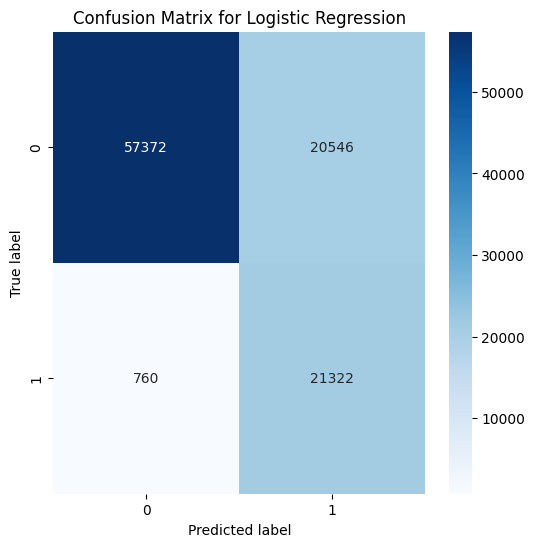

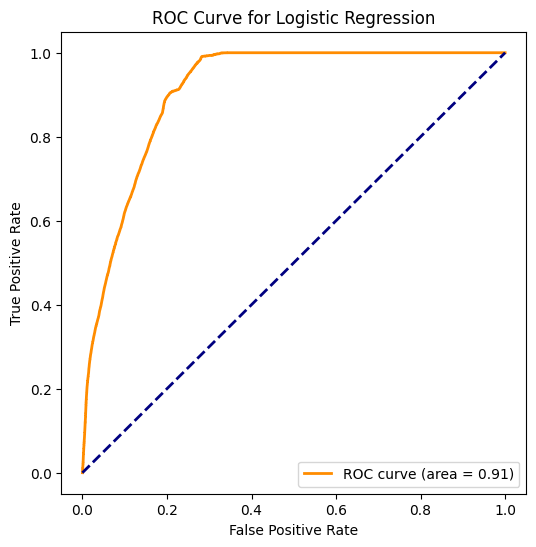

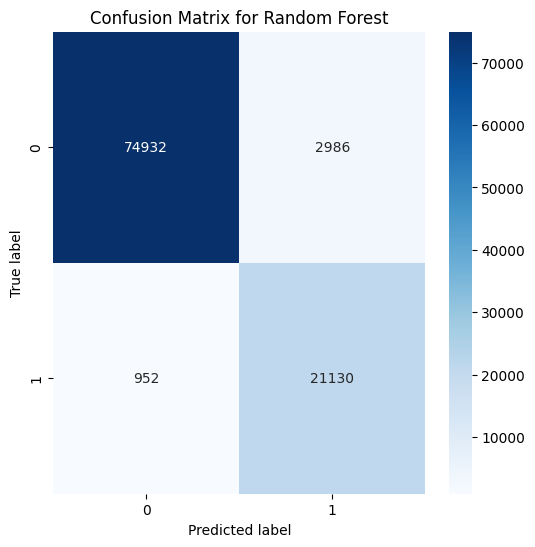

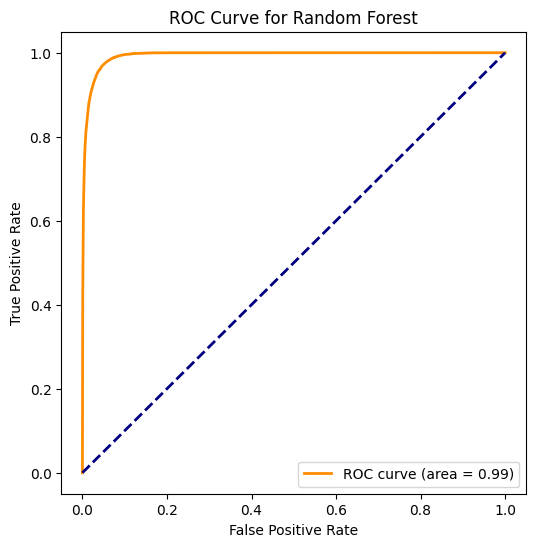

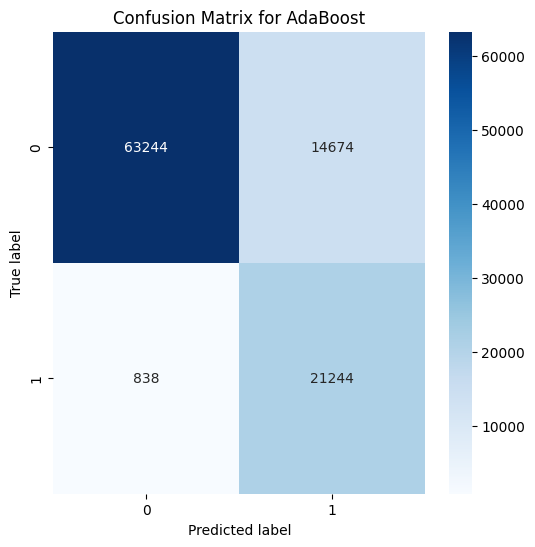

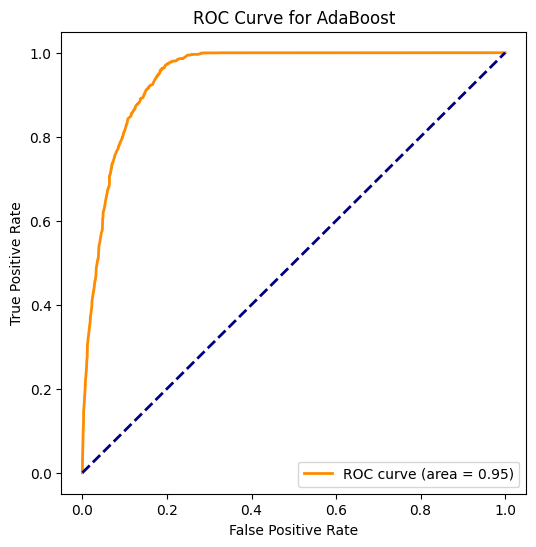

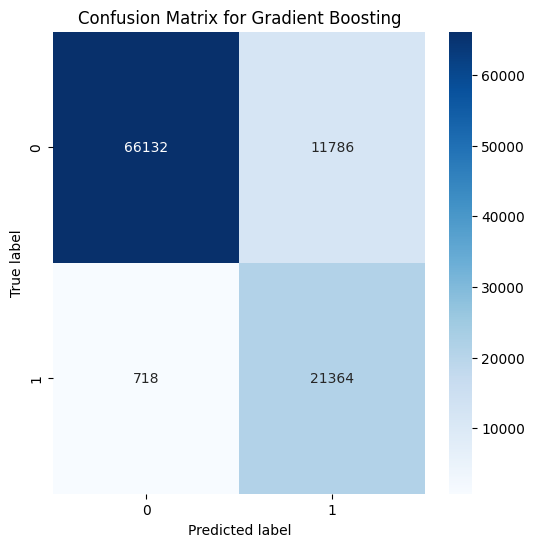

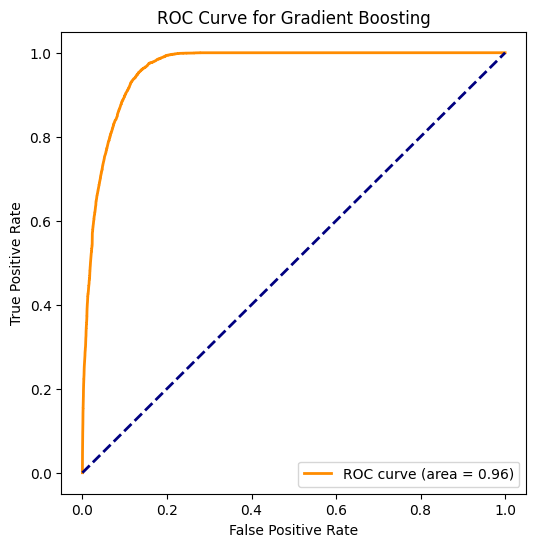

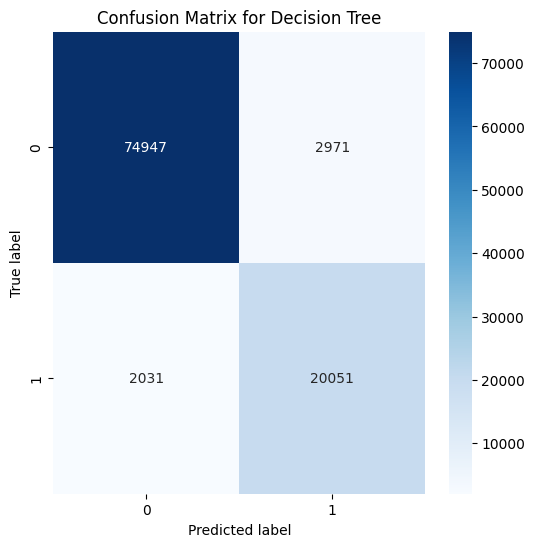

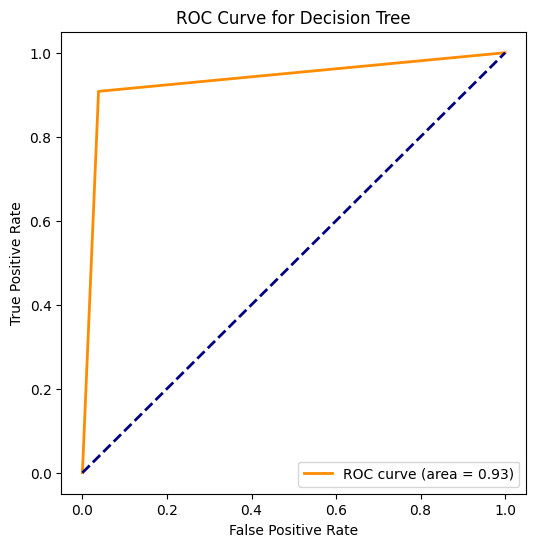


Logistic Regression Classifier:
Accuracy: 0.78694 
F1-Score: 0.6668334636434714 
Recall: 0.9655828276424236 
Precision: 0.5092672207891469 
AUC-ROC: 0.9109975552295732 
Confusion Matrix:
 [[57372 20546]
 [  760 21322]]

Random Forest Classifier:
Accuracy: 0.96062 
F1-Score: 0.9147582146413265 
Recall: 0.9568879630468254 
Precision: 0.876181788024548 
AUC-ROC: 0.9931488289685909 
Confusion Matrix:
 [[74932  2986]
 [  952 21130]]

AdaBoost Classifier:
Accuracy: 0.84488 
F1-Score: 0.7325517241379309 
Recall: 0.9620505389004619 
Precision: 0.5914583217328359 
AUC-ROC: 0.9461018603416201 
Confusion Matrix:
 [[63244 14674]
 [  838 21244]]

Gradient Boosting Classifier:
Accuracy: 0.87496 
F1-Score: 0.7736095017381227 
Recall: 0.9674848292727108 
Precision: 0.6444645550527903 
AUC-ROC: 0.9636502134637587 
Confusion Matrix:
 [[66132 11786]
 [  718 21364]]
malicious    389588
normal       110412
Name: traffic_label, dtype: int64

Process Completed - Time: 0:21:33.897311


In [19]:
# ALL Features are trained - 25 000 instances (25 000 rows - each row is an instance - each row comprises 50 features
# Cross validation applied + Kfold = 5, Hyperparameter tuning applied
# 5 Machine Learning exectuted in this environment: RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier, LogisticRegression
# Bagging (Bootstrap Aggregating) It builds multiple decision trees and merges them together to get a more accurate and stable prediction. Each tree is trained on a random subset of the data.
# AdaBoostClassifier (Adaptive Boosting): Boosting. It combines multiple weak classifiers to create a strong classifier. Each classifier is trained on data, taking into account the previous classifiers' mistakes, by adjusting the weights of incorrectly classified instances.
# GradientBoostingClassifier: Boosting. It builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. Each new model is trained to correct the errors made by previous models.
# DecisionTreeClassifier: Neither bagging nor boosting. It is a single decision tree and can be used as a base estimator in bagging and boosting methods.
# LogisticRegression: Neither bagging nor boosting. It is a single model that uses a logistic function to model a binary dependent variable. However, it can be used as a base estimator in ensemble methods.

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.exceptions import ConvergenceWarning
from IPython.display import display

def record_time(step_name, overall_start_time):
    print(f"{step_name} - Time Elapsed: {datetime.datetime.now() - overall_start_time}")

def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_roc_curve(y_true, y_scores, classifier_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_name}')
    plt.legend(loc='lower right')
    plt.show()

# Define a function to label traffic as normal or malicious
def label_traffic(df):
    # Define normal thresholds
    normal_protocols = [6, 17, 1]  # TCP and UDP
    normal_port_range = set(range(0, 49152))
    normal_pkt_count_max = 2000
    normal_octet_count_max = 1000000
    normal_packet_size_range = range(20, 1500)
    normal_flow_duration_range = range(50, 3600000)  # 50 ms to 1 hour
    normal_piat_range = range(0, 10000)  # 0 to 10 seconds
    max_timestamp = int(1e12)  # Assuming timestamp in milliseconds

    # Initialize the traffic_label column
    df['traffic_label'] = 'normal'

    # Vectorized conditions
    df.loc[~df['proto'].isin(normal_protocols), 'traffic_label'] = 'malicious'
    df.loc[df['flowEndReason'] == 1, 'traffic_label'] = 'malicious'
    df.loc[~df['src_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[~df['dst_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[df['pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
    df.loc[df['octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
    df.loc[~df['min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
    df.loc[~df['min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[(df['flowStart'] < 0) | (df['flowStart'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[(df['flowEnd'] < 0) | (df['flowEnd'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[df['flowEnd'] < df['flowStart'], 'traffic_label'] = 'malicious'

    # Process forward and backward flow features
    for prefix in ['f_', 'b_']:
        df.loc[df[prefix + 'pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
        df.loc[df[prefix + 'octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'

        # Convert IP columns to string, handling NaN values
        df['src_ip'] = df['src_ip'].fillna('unknown').astype(str)
        df['dst_ip'] = df['dst_ip'].fillna('unknown').astype(str)

        # IP Address checks
        normal_src_ip_ranges = ['192.168.', '10.', '172.']
        df.loc[df['src_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'
        df.loc[df['dst_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'


    # Web service, application protocol, and category checks
    normal_web_services = ['Google', 'Microsoft', 'HTTP', 'DNS', 'Amazon', 'MSN', 'TLS', 'Yahoo', 'DHCP', 'WindowsUpdate', 'NetBIOS', 'RX', 'MS_OneDrive', 'GMail', 'Dropbox', 'GoogleServices', 'ICMP', 'UbuntuONE', 'GoogleDrive', 'YouTube', 'HTTP_Proxy', 'NTP', 'Apple', 'AppleiTunes', 'AppleStore', 'ApplePush', 'AppleiCloud', 'IMAPS', 'IMO', 'Office365', 'Skype', 'Cloudflare']
    normal_application_protocols = ['HTTP', 'TLS', 'DNS', 'QUIC', 'IMAPS', 'STUN', 'SMTPS', 'POPS', 'Skype', 'SMBv23', 'NetBIOS', 'RDP', 'ApplePush', 'MQTT']
    normal_categories = ['Network', 'Web', 'SoftwareUpdate', 'RPC', 'System', 'Cloud', 'Mail', 'FTP', 'VPN', 'RemoteAccess', 'Email', 'Media', 'Streaming', 'VoIP', 'Collaborative']

    df.loc[~df['web_service'].isin(normal_web_services), 'traffic_label'] = 'malicious'
    df.loc[~df['application_protocol'].isin(normal_application_protocols), 'traffic_label'] = 'malicious'
    df.loc[~df['category'].isin(normal_categories), 'traffic_label'] = 'malicious'

    return df

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-250000rows(ALLFEATURES).csv')
df = label_traffic(df)

print("step 1 - label_traffic new column added to the dataset")
display(df.head(5))

print("step 2 - Specific Features dropped")
display(df.head(5))

overall_start_time = datetime.datetime.now()
record_time("Dataset Loaded and Preprocessed", overall_start_time)

# Handle NaN values and mixed types
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype == np.float64 else x.fillna('Unknown'))
record_time(" NaN values and mixed types Handled", overall_start_time)

print("step 3 - NaN values and mixed types Handled")
display(df.head())

# Encode categorical labels
label_encoder = LabelEncoder()
# Encode categorical labels using an existing column
df = pd.get_dummies(df, columns=['proto'])

df['traffic_label_encoded'] = label_encoder.fit_transform(df['traffic_label'])
record_time("Categorical Labels Encoded", overall_start_time)

print("step 4 - After Encodign categorical labels")
display(df.head(5))

# Split data into training and testing sets
X = df.drop(['traffic_label', 'traffic_label_encoded'], axis=1)  # Now X includes all features
y = df['traffic_label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

record_time("Data Split into Training 80% and Testing 20% of the dataset", overall_start_time)

# Filter only numeric columns for scaling
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Apply scaling to numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)
record_time("Scaling to numeric data Completed", overall_start_time)
print("step 5 - Scaling oto numeric data Completed")

# SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
record_time("SMOT for class imbalance applied", overall_start_time)
print("step 6 - SMOT applied")

# Define the StratifiedKFold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
record_time("StratifiedKFold 5 folds cross-validator Implemented", overall_start_time)
print("step 7 - cross validation 5 fold applied")

# Hyperparameter grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500]
}
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
}
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
}
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
record_time("Hyperparameter Tuning applied to all models", overall_start_time)
print("step 8 - Hyperparameter Tuning applied")

# Suppress ConvergenceWarning for logistic regression
warnings.filterwarnings("ignore", category=ConvergenceWarning)
lr_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
ab_clf = AdaBoostClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

lr_clf.fit(X_train_resampled, y_train_resampled)
rf_clf.fit(X_train_resampled, y_train_resampled)
ab_clf.fit(X_train_resampled, y_train_resampled)
gb_clf.fit(X_train_resampled, y_train_resampled)
dt_clf.fit(X_train_resampled, y_train_resampled)
record_time("Classifiers Fitted", overall_start_time)

# Evaluate models and plot confusion matrices and ROC curves
for clf, name in [(lr_clf, 'Logistic Regression'), (rf_clf, 'Random Forest'), (ab_clf, 'AdaBoost'), (gb_clf, 'Gradient Boosting'), (dt_clf, 'Decision Tree')]:
    # Predictions and probabilities
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    # ROC curve
    plot_roc_curve(y_test, y_pred_proba, name)

# Calculate accuracy and F1-score for each model
lr_accuracy, lr_f1 = accuracy_score(y_test, lr_clf.predict(X_test_scaled)), f1_score(y_test, lr_clf.predict(X_test_scaled))
rf_accuracy, rf_f1 = accuracy_score(y_test, rf_clf.predict(X_test_scaled)), f1_score(y_test, rf_clf.predict(X_test_scaled))
ab_accuracy, ab_f1 = accuracy_score(y_test, ab_clf.predict(X_test_scaled)), f1_score(y_test, ab_clf.predict(X_test_scaled))
gb_accuracy, gb_f1 = accuracy_score(y_test, gb_clf.predict(X_test_scaled)), f1_score(y_test, gb_clf.predict(X_test_scaled))
dt_accuracy, dt_f1 = accuracy_score(y_test, dt_clf.predict(X_test_scaled)), f1_score(y_test, dt_clf.predict(X_test_scaled))

# Calculate recall for each model
lr_recall = recall_score(y_test, lr_clf.predict(X_test_scaled))
rf_recall = recall_score(y_test, rf_clf.predict(X_test_scaled))
ab_recall = recall_score(y_test, ab_clf.predict(X_test_scaled))
gb_recall = recall_score(y_test, gb_clf.predict(X_test_scaled))
dt_recall = recall_score(y_test, dt_clf.predict(X_test_scaled))

# Calculate precision for each model
lr_precision = precision_score(y_test, lr_clf.predict(X_test_scaled))
rf_precision = precision_score(y_test, rf_clf.predict(X_test_scaled))
ab_precision = precision_score(y_test, ab_clf.predict(X_test_scaled))
gb_precision = precision_score(y_test, gb_clf.predict(X_test_scaled))
dt_precision = precision_score(y_test, dt_clf.predict(X_test_scaled))

# Calculate AUC-ROC for each model
lr_auc = roc_auc_score(y_test, lr_clf.predict_proba(X_test_scaled)[:, 1])
rf_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test_scaled)[:, 1])
ab_auc = roc_auc_score(y_test, ab_clf.predict_proba(X_test_scaled)[:, 1])
gb_auc = roc_auc_score(y_test, gb_clf.predict_proba(X_test_scaled)[:, 1])
dt_auc = roc_auc_score(y_test, dt_clf.predict_proba(X_test_scaled)[:, 1])

# Print the results along with confusion matrix numbers
print("\nLogistic Regression Classifier:\nAccuracy:", lr_accuracy, "\nF1-Score:", lr_f1, "\nRecall:", lr_recall, "\nPrecision:", lr_precision, "\nAUC-ROC:", lr_auc, "\nConfusion Matrix:\n", confusion_matrix(y_test, lr_clf.predict(X_test_scaled)))
print("\nRandom Forest Classifier:\nAccuracy:", rf_accuracy, "\nF1-Score:", rf_f1, "\nRecall:", rf_recall, "\nPrecision:", rf_precision, "\nAUC-ROC:", rf_auc, "\nConfusion Matrix:\n", confusion_matrix(y_test, rf_clf.predict(X_test_scaled)))
print("\nAdaBoost Classifier:\nAccuracy:", ab_accuracy, "\nF1-Score:", ab_f1, "\nRecall:", ab_recall, "\nPrecision:", ab_precision, "\nAUC-ROC:", ab_auc, "\nConfusion Matrix:\n", confusion_matrix(y_test, ab_clf.predict(X_test_scaled)))
print("\nGradient Boosting Classifier:\nAccuracy:", gb_accuracy, "\nF1-Score:", gb_f1, "\nRecall:", gb_recall, "\nPrecision:", gb_precision, "\nAUC-ROC:", gb_auc, "\nConfusion Matrix:\n", confusion_matrix(y_test, gb_clf.predict(X_test_scaled)))

class_counts = df['traffic_label'].value_counts()
print(class_counts)
print("\nProcess Completed - Time:", datetime.datetime.now() - overall_start_time)